## Paso 1: Planteamiento del problema y recopilación de datos

Antes de comenzar a analizar el conjunto de datos, debemos entender, por un lado, el problema o desafío que estamos intentando resolver con esta información y lo idóneo o útil que puede resultarnos.

En este caso, queremos analizar qué personas sobrevivieron o no en el naufragio del Titanic y, en sucesivas fases, poder entrenar un modelo de Machine Learning para responder a la pregunta: "¿Qué tipo de personas tenían más probabilidades de sobrevivir?". Por lo tanto, encontramos que el dataset del que disponemos puede ayudarnos a resolver la cuestión planteada y aplicamos un proceso de EDA para conocerlo más en detalle.

Importaremos el conjunto de datos para comenzar a trabajar con él:

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
# Your code here

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# PASO 2: EXPLORACIÓN Y LIMPIEZA DE DATOS

## Obtener las dimensiones

In [213]:
total_data.shape

(48895, 16)

# obtener información sobre tipos de datos y valores no nulos

In [214]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

¿QUÉ INFORMACIÓN NOS DAN LOS DATOS?

- Existen un total de 48895 filas, que indican los nombres de los inmuebles que estan en alquiler con la plataforma Airbnb, en la ciudad de Nueva York.
- Existen un total de 16 columnas, entre las que se encuentra el target, price. 
- Las variables last_review y reviews_per_month cuentan con 38843 instancias con valores, es decir que contendran unos 10052 valores nulos.
- Los datos cuentan con 10 características numéricas y 6 características categóricas.

## Eliminar Duplicados

In [215]:
# Buscar duplicados
print(f"Nombres duplicados: {total_data['name'].duplicated().sum()}")
print(f"Host ID duplicados: {total_data['host_id'].duplicated().sum()}")
print(f"Id duplicados: {total_data['id'].duplicated().sum()}")
print(f"últimas reseñas duplicadas: {total_data['last_review'].duplicated().sum()}")

Nombres duplicados: 989
Host ID duplicados: 11438
Id duplicados: 0
últimas reseñas duplicadas: 47130


# Eliminar información irrelevante

In [216]:
# Eliminar información irrelevante
total_data.drop(["id", "name", "host_name", "last_review"], axis = 1, inplace = True)
total_data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# Paso 3: ANÁLISIS DE VARIABLES UNIVARIANTE

ANÁLISIS DE VARIABLES CATEGÓRICAS

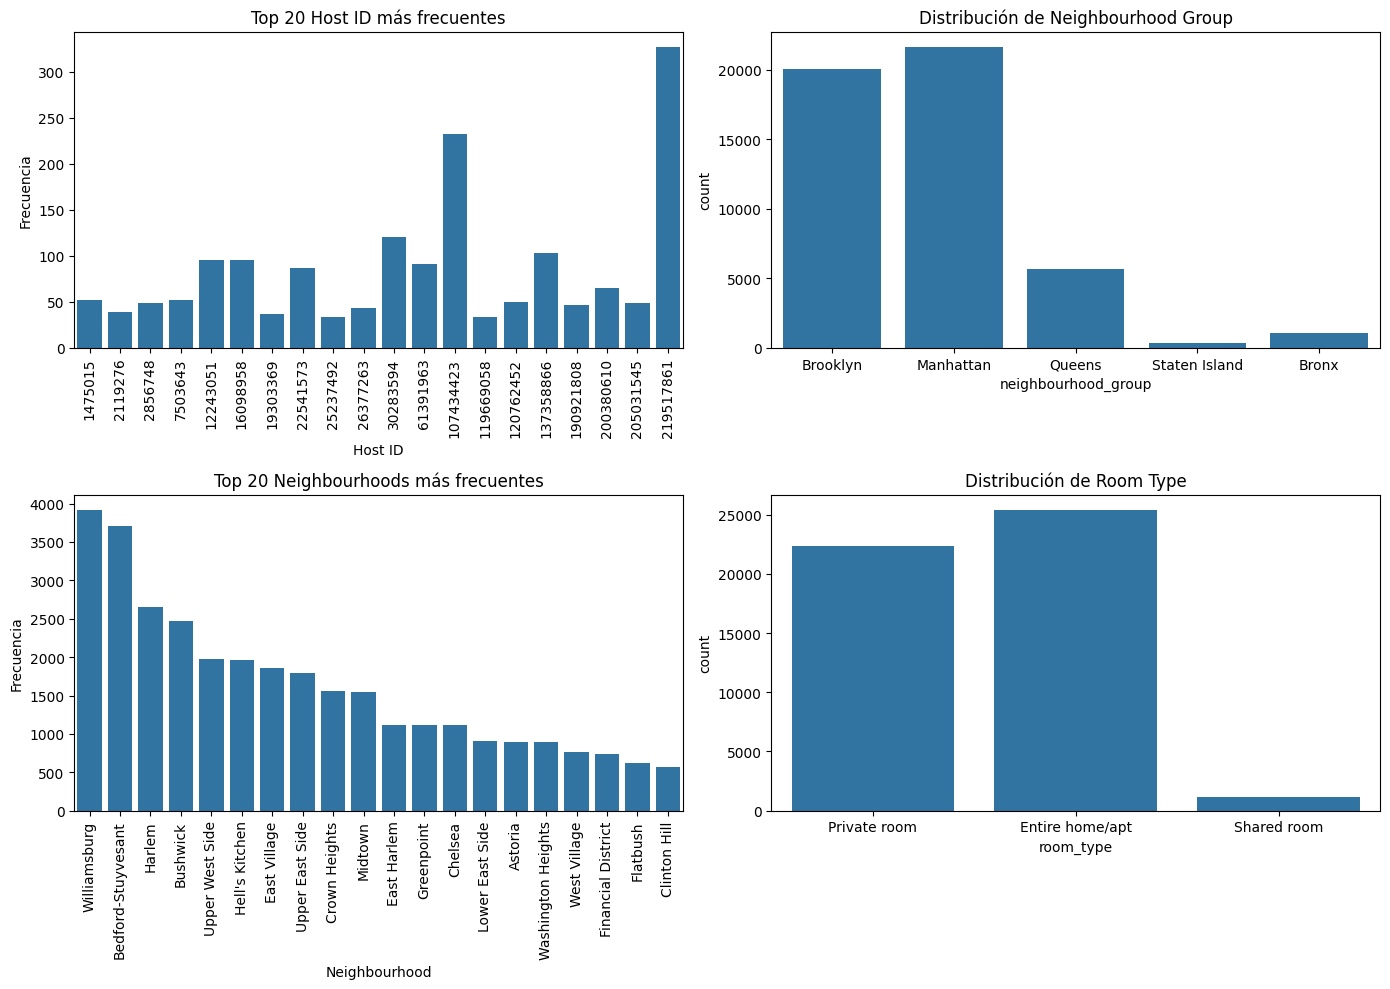

In [217]:
# Crear la figura con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograma para host_id (agrupado)
top_hosts = total_data['host_id'].value_counts().nlargest(20)  # Tomamos los 20 más frecuentes
sns.barplot(x=top_hosts.index, y=top_hosts.values, ax=axes[0, 0])
axes[0, 0].set_title("Top 20 Host ID más frecuentes")
axes[0, 0].set_xlabel("Host ID")
axes[0, 0].set_ylabel("Frecuencia")
axes[0, 0].tick_params(axis='x', rotation=90)  # Rotamos etiquetas

# Histograma para neighbourhood_group
sns.countplot(data=total_data, x="neighbourhood_group", ax=axes[0, 1])
axes[0, 1].set_title("Distribución de Neighbourhood Group")

# Histograma para neighbourhood (agrupado por los más frecuentes)
top_neighbourhoods = total_data["neighbourhood"].value_counts().nlargest(20)
sns.barplot(x=top_neighbourhoods.index, y=top_neighbourhoods.values, ax=axes[1, 0])
axes[1, 0].set_title("Top 20 Neighbourhoods más frecuentes")
axes[1, 0].set_xlabel("Neighbourhood")
axes[1, 0].set_ylabel("Frecuencia")
axes[1, 0].tick_params(axis='x', rotation=90)  # Evita superposición

# Histograma para room_type
sns.countplot(data=total_data, x="room_type", ax=axes[1, 1])
axes[1, 1].set_title("Distribución de Room Type")

# Ajustar diseño
plt.tight_layout()
plt.show()


- Host ID: algunos de estos, tienen muchas más propiedades que otros, como son, el 107434423 y 219517861; esto sugiere que algunos anfitriones son grandes propietarios o administradores de multiples propiedades ofertadas en Airbnb, es decir, que Airbnb en la ciudad de Nueva York, no está dominado significativamente por anfitriones particulares; hay anfitriones comerciales de gran envergadura ofertando alquileres turísticos.
- Neighbourhood Group: Brooklyn y Manhattan muestran significativamente más oferta que Queens, Staten Island y Bronx, y se infiere que es así porque en Brooklyn y Manhattan contienen zonas turísticas y comerciales más populares, a comparación con los demás. 
- Neighbourhood: Algunos barrios tienen mayor oferta de propiedades que otros, por ejemplo, Williamsburg. Esto puede deberse a que esos barrios tengan cercanía a puntos turísticos y/o cercanía a atracciones específicas; esto puede tener incidencia directa en el precio y disponibilidad, tanto para las propiedades turísticas en sí, como en el mercado inmobiliario para los residentes locales.
- Room Type: los Entire home o apartments (apartamentos o vivienda entera) dominan los listados, mientras que las Shared room (habitación compartida) tiene una presencia mínima. Esto evidencia la popularidad de los pisos enteros, que puede significar que el perfil del cliente busca una estancia con la mayor privacidad, lo que incide en que haya mayor oferta de este tipo de alquileres, por encima de los otros. 

ANÁLISIS DE VARIABLES NUMÉRICAS

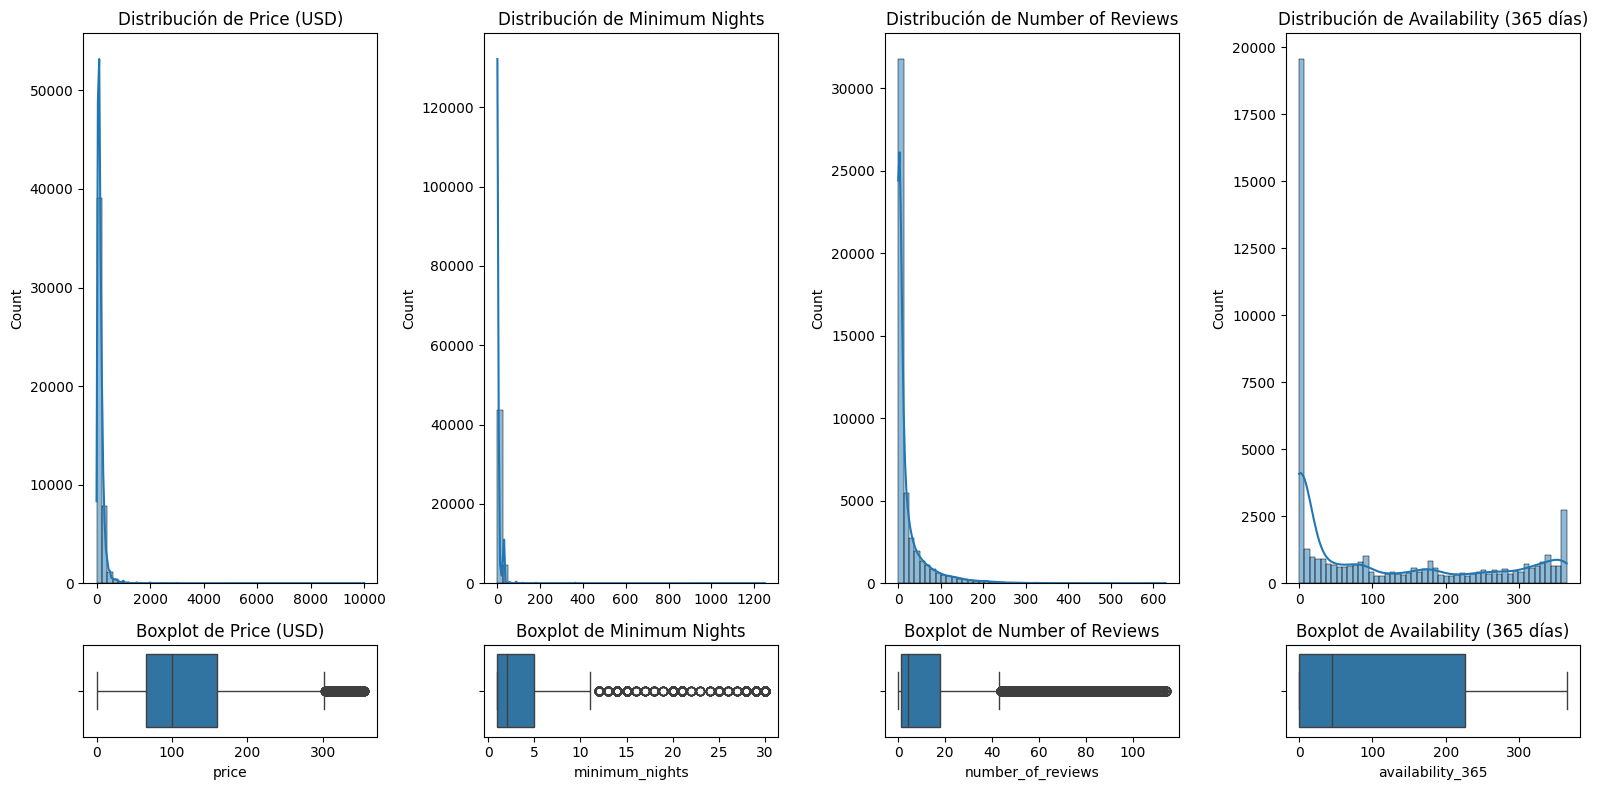

In [218]:
# Crear una figura con 4 columnas (una por variable) y 2 filas (histograma arriba, boxplot abajo)
fig, axes = plt.subplots(2, 4, figsize=(16, 8), gridspec_kw={'height_ratios': [6, 1]})

# Variables a analizar
variables = ["price", "minimum_nights", "number_of_reviews", "availability_365"]
titles = ["Price (USD)", "Minimum Nights", "Number of Reviews", "Availability (365 días)"]

# Graficar histogramas y boxplots
for i, var in enumerate(variables):
    # Histograma
    sns.histplot(data=total_data, x=var, bins=50, ax=axes[0, i], kde=True)
    axes[0, i].set_title(f"Distribución de {titles[i]}")
    axes[0, i].set_xlabel(None)  # Ocultar el label del eje x en el histograma
    
    # Boxplot (filtrando el 5% superior para evitar valores extremos en price, minimum_nights y number_of_reviews)
    if var in ["price", "minimum_nights", "number_of_reviews"]:
        filtro = total_data[var] <= total_data[var].quantile(0.95)
        sns.boxplot(data=total_data[filtro], x=var, ax=axes[1, i])
    else:
        sns.boxplot(data=total_data, x=var, ax=axes[1, i])
    
    axes[1, i].set_title(f"Boxplot de {titles[i]}")

# Ajustar diseño
plt.tight_layout()
plt.show()

- La distribución está fuertemente sesgada a la derecha en las variables Price, Minimun Nights y Number of reviews. 
La mayoría de los precios se concentran en el extremo inferior, con una larga cola hacia precios más altos. Esto sugiere que hay muchos alojamientos con precios bajos y relativamente pocos con precios muy altos, que puede estar motivado por propiedades lujosas o de ubicaciones exclusivas. La mayoría de los precios están por debajo de los 2000 USD. 
La mayoría de los alojamientos tienen un número mínimo de noches bajo. Se observa una concentración muy alta en los valores mínimos, lo que indica que muchos alojamientos tienen requisitos mínimos de estancia cortos.
La mayoría de los alojamientos tienen un número relativamente bajo de reseñas. La distribución muestra que muchos alojamientos tienen pocas o ninguna reseña, mientras que unos pocos tienen un gran número de reseñas.

    El boxplot confirma la presencia de numerosos valores atípicos (outliers). Esto indica que hay algunos alojamientos con precios significativamente más altos que la mayoría; sugiere que hay alojamientos con requisitos mínimos de estancia inusualmente largos; y que algunos alojamientos tienen un número excepcionalmente alto de reseñas.
    La caja del boxplot es muy pequeña comparada con la cantidad de datos que se encuentran fuera de la misma. Esto quiere decir que hay mucha diferencia entre los valores de los cuartiles y los valores atipicos, en las tres variables.

- Availability 365: Esta distribución es un poco diferente. Muestra una distribución bimodal, con picos en los extremos (0 y 365) y una distribución relativamente uniforme en el medio. Esto sugiere que hay muchos alojamientos que están disponibles todo el año o ninguno, y también muchos que tienen disponibilidad parcial.

    Este boxplot es el que tiene una distribucion mas normal, aunque también posee valores atipicos. Se observa que la mediana se encuentra aproximandamente en la mitad del gráfico.



NOTA PARA MI:
#Tratamiento de valores atípicos: Considera si es necesario investigar y tratar los valores atípicos, ya que pueden afectar tus análisis posteriores.

#Transformación de datos: Para las variables sesgadas, podrías considerar aplicar transformaciones (por ejemplo, logarítmica) para hacer las distribuciones más normales.


## Paso 4: Análisis de variables multivariante.

ANÁLISIS NUMÉRICO-NUMÉRICO

Tras analizar las características una a una, es momento de analizarlas en relación con la predictora y con ellas mismas, para sacar conclusiones más claras acerca de sus relaciones y poder tomar decisiones sobre su procesamiento.

Utilizaremos la variable `price` para comenzar con el análisis bivariante, por ser el target de nuestro EDA. Primero analizamos la clase frente a las características numéricas `minimun_nights`, `number_of_reviews`, `availability_365`:

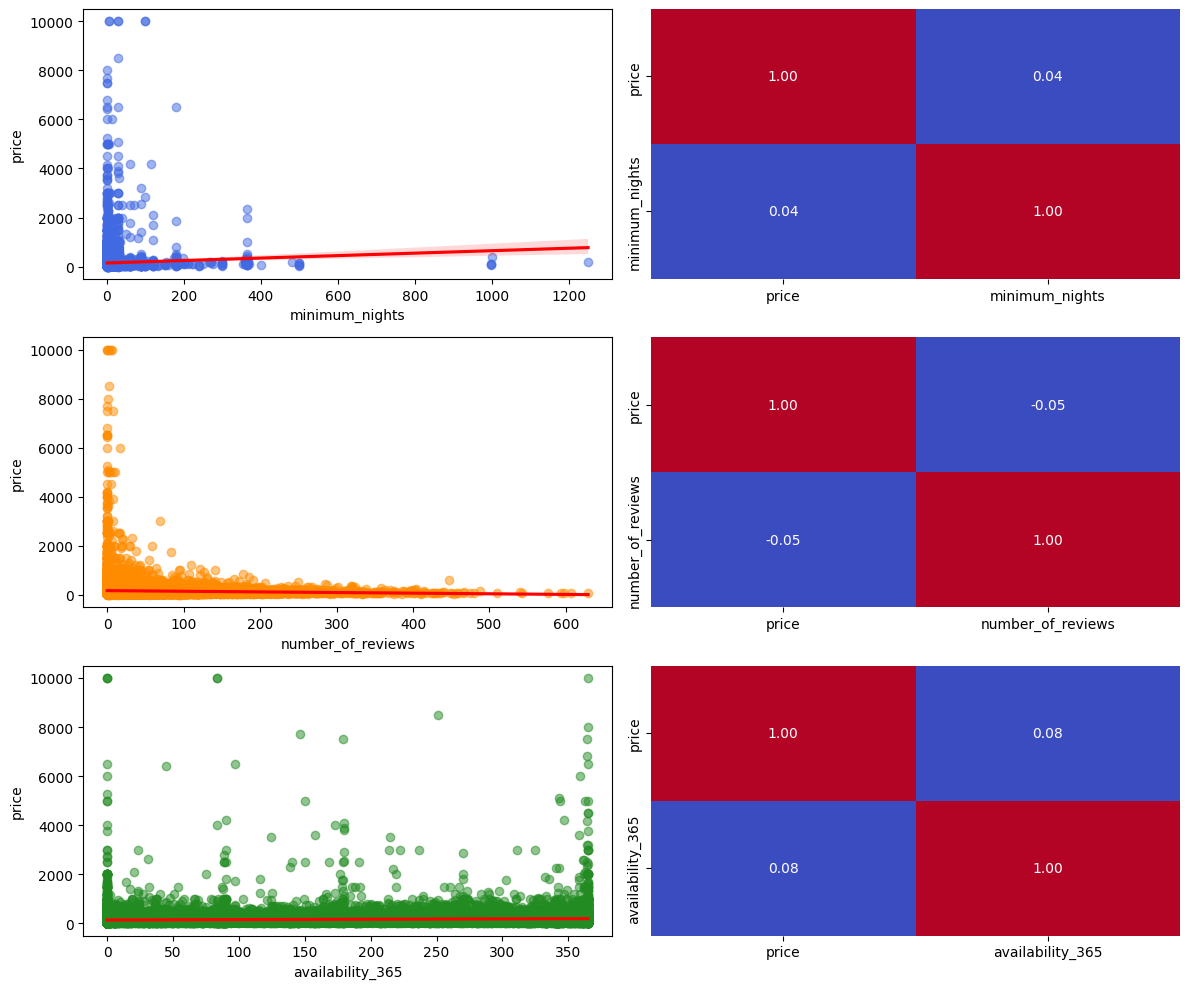

In [219]:
fig, axis = plt.subplots(3, 2, figsize=(12, 10))

variables = ["minimum_nights", "number_of_reviews", "availability_365"]
colors = ["royalblue", "darkorange", "forestgreen"]  # Colores para cada gráfico

for i, (var, color) in enumerate(zip(variables, colors)):
    sns.regplot(ax=axis[i, 0], data=total_data, x=var, y="price",
                scatter_kws={"color": color, "alpha": 0.5},  # Color y transparencia de los puntos
                line_kws={"color": "red"})  # Color de la línea de regresión
    sns.heatmap(total_data[["price", var]].corr(), annot=True, fmt=".2f",
                ax=axis[i, 1], cbar=False, cmap="coolwarm")

# Ajustar el layout
plt.tight_layout()
plt.show()

Del gráfico anterior podemos obtener las siguientes conclusiones:

- Relación price-minimun_nights: el diagrama de dispersión muestra una alta concentración de valores en la parte baja del eje X, con algunos valores atípicos de estancias mínimas muy largas. La línea de regresión tiene una pendiente poco pronunciada, esto sugiere una relación débil entre ambas variables. Un coeficiente de correlación de variantes de 0.04, confirma que no hay una relación fuerte entre ambas variables. 

- Relación price-number_of_reviews: se observa una mayor cantidad de alojamientos con precios bajos y un número reducido de reseñas; la relación parece negativa, ya que los alojamientos con más reseñas tienen a tener precios más bajos. El coeficiente de correlación es de -0.05, sugiriendo que a medida que aumentan las reseñas, el precio tiende a disminuir ligeramente, aunque la relación es débil. 

- Relación price-availability_365: el gráfico muestra una distribución dispersa, lo que no evidencia una tendencia evidente. El coeficiente de correlación de 0.08 indica que la disponibilidad de los alojamientos no influye significativamente en el precio de los mismos. 

## Las tres variables utilizadas para el Análisis de variables multivariantes numérico-numérico tienen una relación baja con respecto al precio de los alojamientos, en general. Esto puede sugerir que otros factores pueden ser más determinantes en la fijación de los precios, como por ejemplo, la ubicación o el tipo de alojamiento.

ANÁLISIS CATEGÓTICO-CATEGÓTICO

Utilizaremos la variable `price` para comenzar con el análisis bivariante. Al ser una variable numérica, primero se realiza una conversión de la misma para poder hacer el análisis, motivado a que `price` es la target. Primero analizamos la clase frente a las características categóticas `host_id`, `neighbouthood_group` y `neighbouthood`:

In [220]:
bins = [total_data["price"].min(), 
        total_data["price"].quantile(0.25), 
        total_data["price"].quantile(0.50), 
        total_data["price"].quantile(0.75), 
        total_data["price"].max()]

labels = ["Muy Barato", "Barato", "Medio", "Caro"]

total_data["price_category"] = pd.cut(total_data["price"], bins=bins, labels=labels, include_lowest=True)
print(total_data["price_category"].value_counts())


price_category
Muy Barato    12371
Medio         12246
Caro          12177
Barato        12101
Name: count, dtype: int64


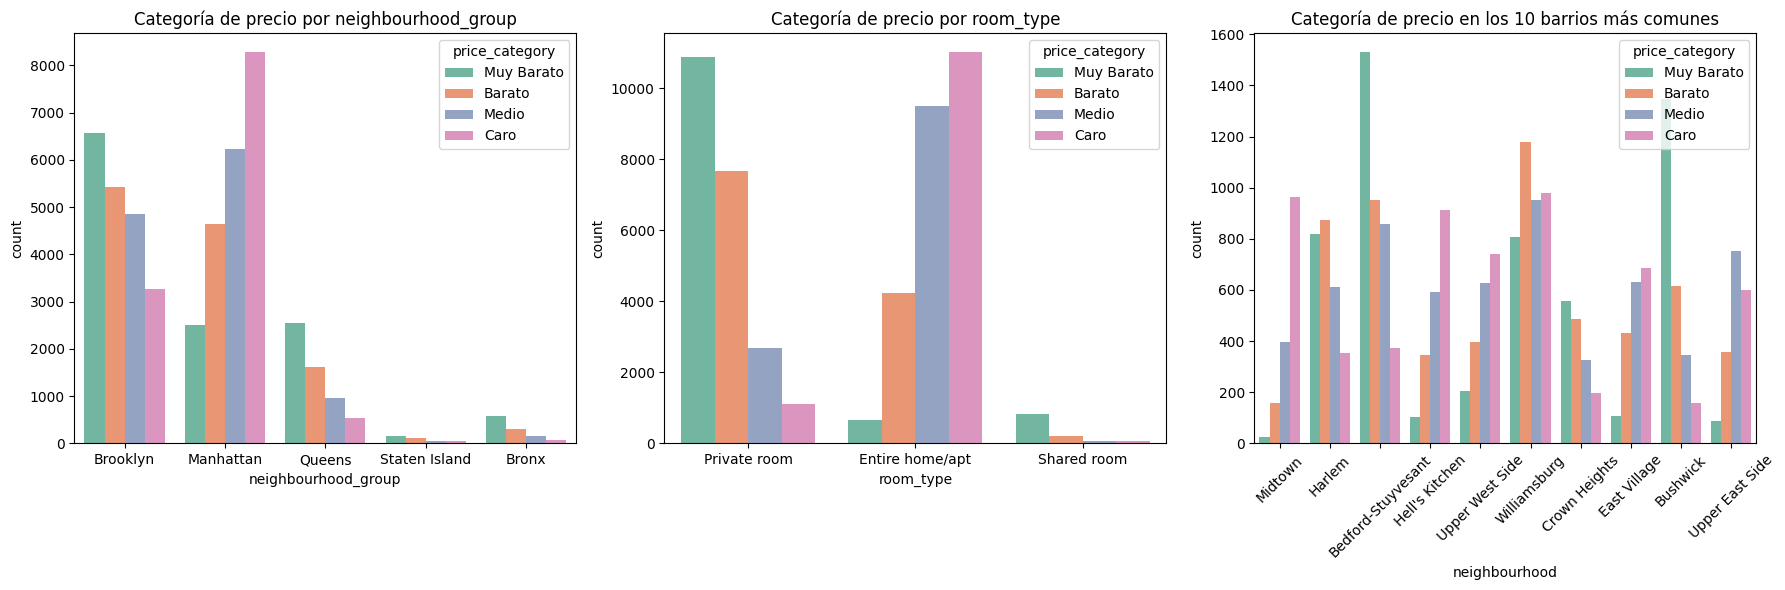

In [221]:
fig, axis = plt.subplots(1, 3, figsize=(18, 6))

palette = "Set2"

# Gráfico 1: Neighbourhood Group vs Categoría de Precio
sns.countplot(ax=axis[0], data=total_data, x="neighbourhood_group", hue="price_category", palette=palette)
axis[0].set_title("Categoría de precio por neighbourhood_group")

# Gráfico 2: Room Type vs Categoría de Precio
sns.countplot(ax=axis[1], data=total_data, x="room_type", hue="price_category", palette=palette)
axis[1].set_title("Categoría de precio por room_type")

# Gráfico 3: Neighbourhood (Top 10 más comunes) vs Categoría de Precio
top_neighbourhoods = total_data["neighbourhood"].value_counts().index[:10]
filtered_data = total_data[total_data["neighbourhood"].isin(top_neighbourhoods)]

sns.countplot(ax=axis[2], data=filtered_data, x="neighbourhood", hue="price_category", palette=palette)
axis[2].set_title("Categoría de precio en los 10 barrios más comunes")
axis[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Del gráfico anterior podemos obtener las siguientes conclusiones:

- Relación price_category-neighbourhood_group: Ciertos grupos de barrios tienen una mayor concentración de alojamientos en categorías de precios específicas; por ejemplo, es probable que en zonas como Manhattan haya más alojamientos en la categoría "Caro", mientras que en el Bronx hay más alojamientos en la categoría "Muy Barato". Esto evidencia la influencia significativa entre la ubicación y los precios de los alojamientos.

- Relación price_category-room_type: Los alojamientos "enteros" tienden a estar más concentrados en las categorías de precios más altos; mientras que las habitaciones compartidas y las habitaciones privadas, tienden a ser más baratos. Se evidencia que el tipo de alojamiento incide en el precio ofertado.

- Relación price_category-neighbourhoods: Los barrios más populares tienden a que los precios de los alojamientos sea más alto, lo que puede significar que no sólo los neighbourhood_group son importantes; cada barrio tiene su propio rango de precios predominante. 


##### Combinaciones de la clase con varias predictoras

El análisis multivariante también permite combinar la clase con varias predictoras al mismo tiempo para enriquecer el análisis. Este tipo de operaciones deben ser subjetivas y deben combinar características relacionadas entre sí. 

# ANÁLISIS DE CORRELACIONES


In [222]:
total_data

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,Medio
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,Caro
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,Medio
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,Barato
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,Barato
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9,Barato
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36,Muy Barato
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27,Medio
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2,Muy Barato


In [223]:
total_data["room_type"].unique()
total_data["room_type"].value_counts()


room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [224]:
# EN EL EDA HACÉIS:

total_data["room_type_n"] = pd.factorize(total_data["room_type"])[0]

room_type_transformation_rules = {row["room_type"]: row["room_type_n"] for _, row in total_data[["room_type", "room_type_n"]].drop_duplicates().iterrows()}
# diccionario
# {
#     "private room": 0,
#     "entire home/apt": 1,
#     "shared room": 2
# }
import json

with open("room_type_transformation_rules.json", "w") as f:
  json.dump(room_type_transformation_rules, f)

# ----------------------------------------------------------------------------------
# EN PRODUCCIÓN (CUANDO HAYÁIS ENTRENADO EL MODELO Y OS LLEGUEN DATOS NUEVOS) HACÉIS:

with open("room_type_transformation_rules.json", "r") as f:
  room_type_transformation_rules = json.load(f)

total_data["room_type_n"] = total_data["room_type"].apply(lambda x: room_type_transformation_rules[x])

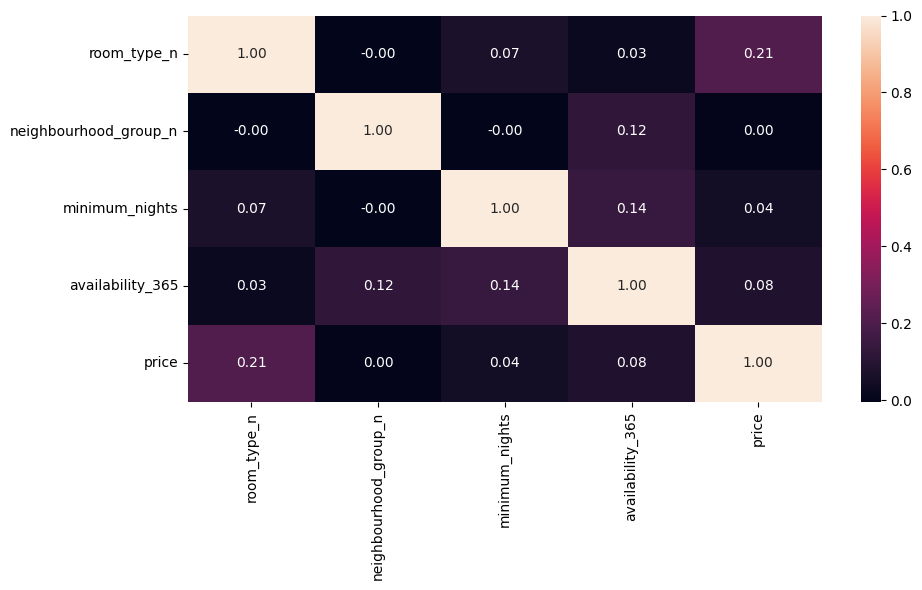

In [238]:
total_data["room_type_n"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_group_n"] = pd.factorize(total_data["neighbourhood_group"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["room_type_n", "neighbourhood_group_n", "minimum_nights", "availability_365", "price"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [239]:
list(set(total_data["room_type"]))

[0, 1, 2]

ANÁLISIS NUMÉRICO-CATEGÓTICO

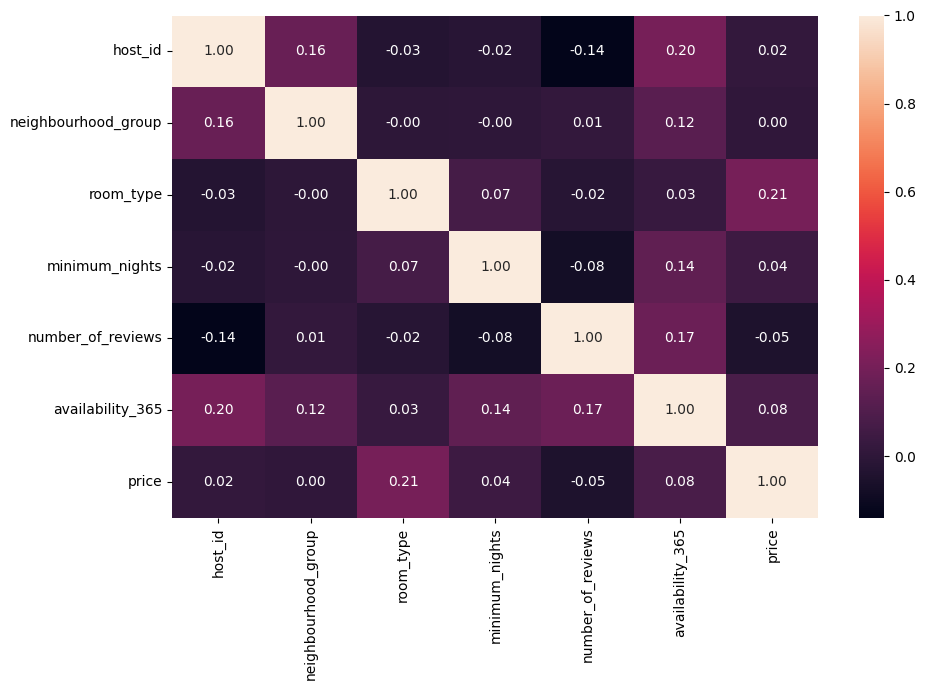

In [226]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(total_data[["host_id", "neighbourhood_group", "room_type", "minimum_nights", "number_of_reviews", "availability_365", "price"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

- Se evidencia, que entre el room_type y price, aunque es leve, hay una correlación positiva, por lo que puede ser una de las variables más propenzas a influir en el precio de los alojamientos.

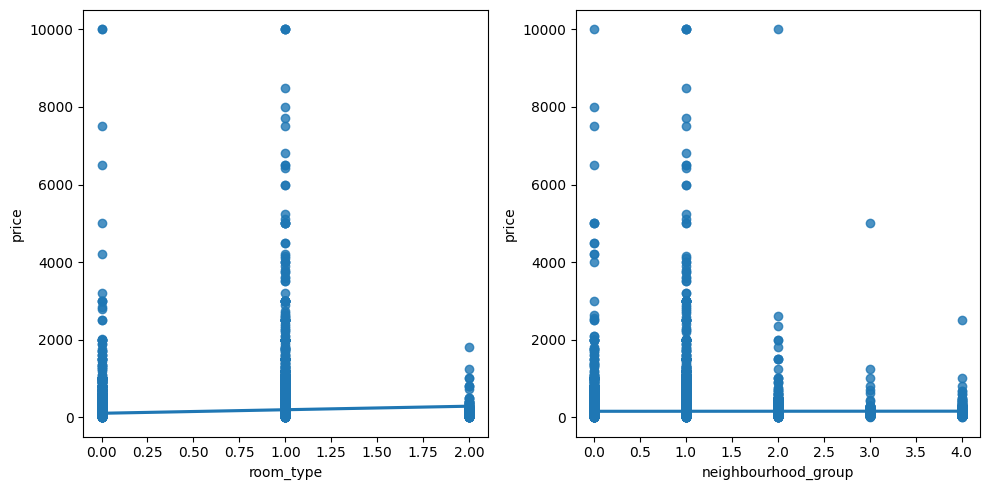

In [227]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = total_data, x = "room_type", y = "price")
sns.regplot(ax = axis[1], data = total_data, x = "neighbourhood_group", y = "price")
plt.tight_layout()

plt.show()

- Se muestra una ligera tendencia a que ciertos tipos de alojamientos tengan precios más altos, sin embargo la relación no es muy fuerte, ya que hay mucha variación de precio en cada tipo de alojamiento. 
- Los valores atípicos con precios muy altos sugiere que hay algunos alojamientos excepcionalmente costosos, que pueden presentar, por ejemplo, si hay alojamientos de lujo. 
- La mayoría de los alojamientos tienen precios bajos. 


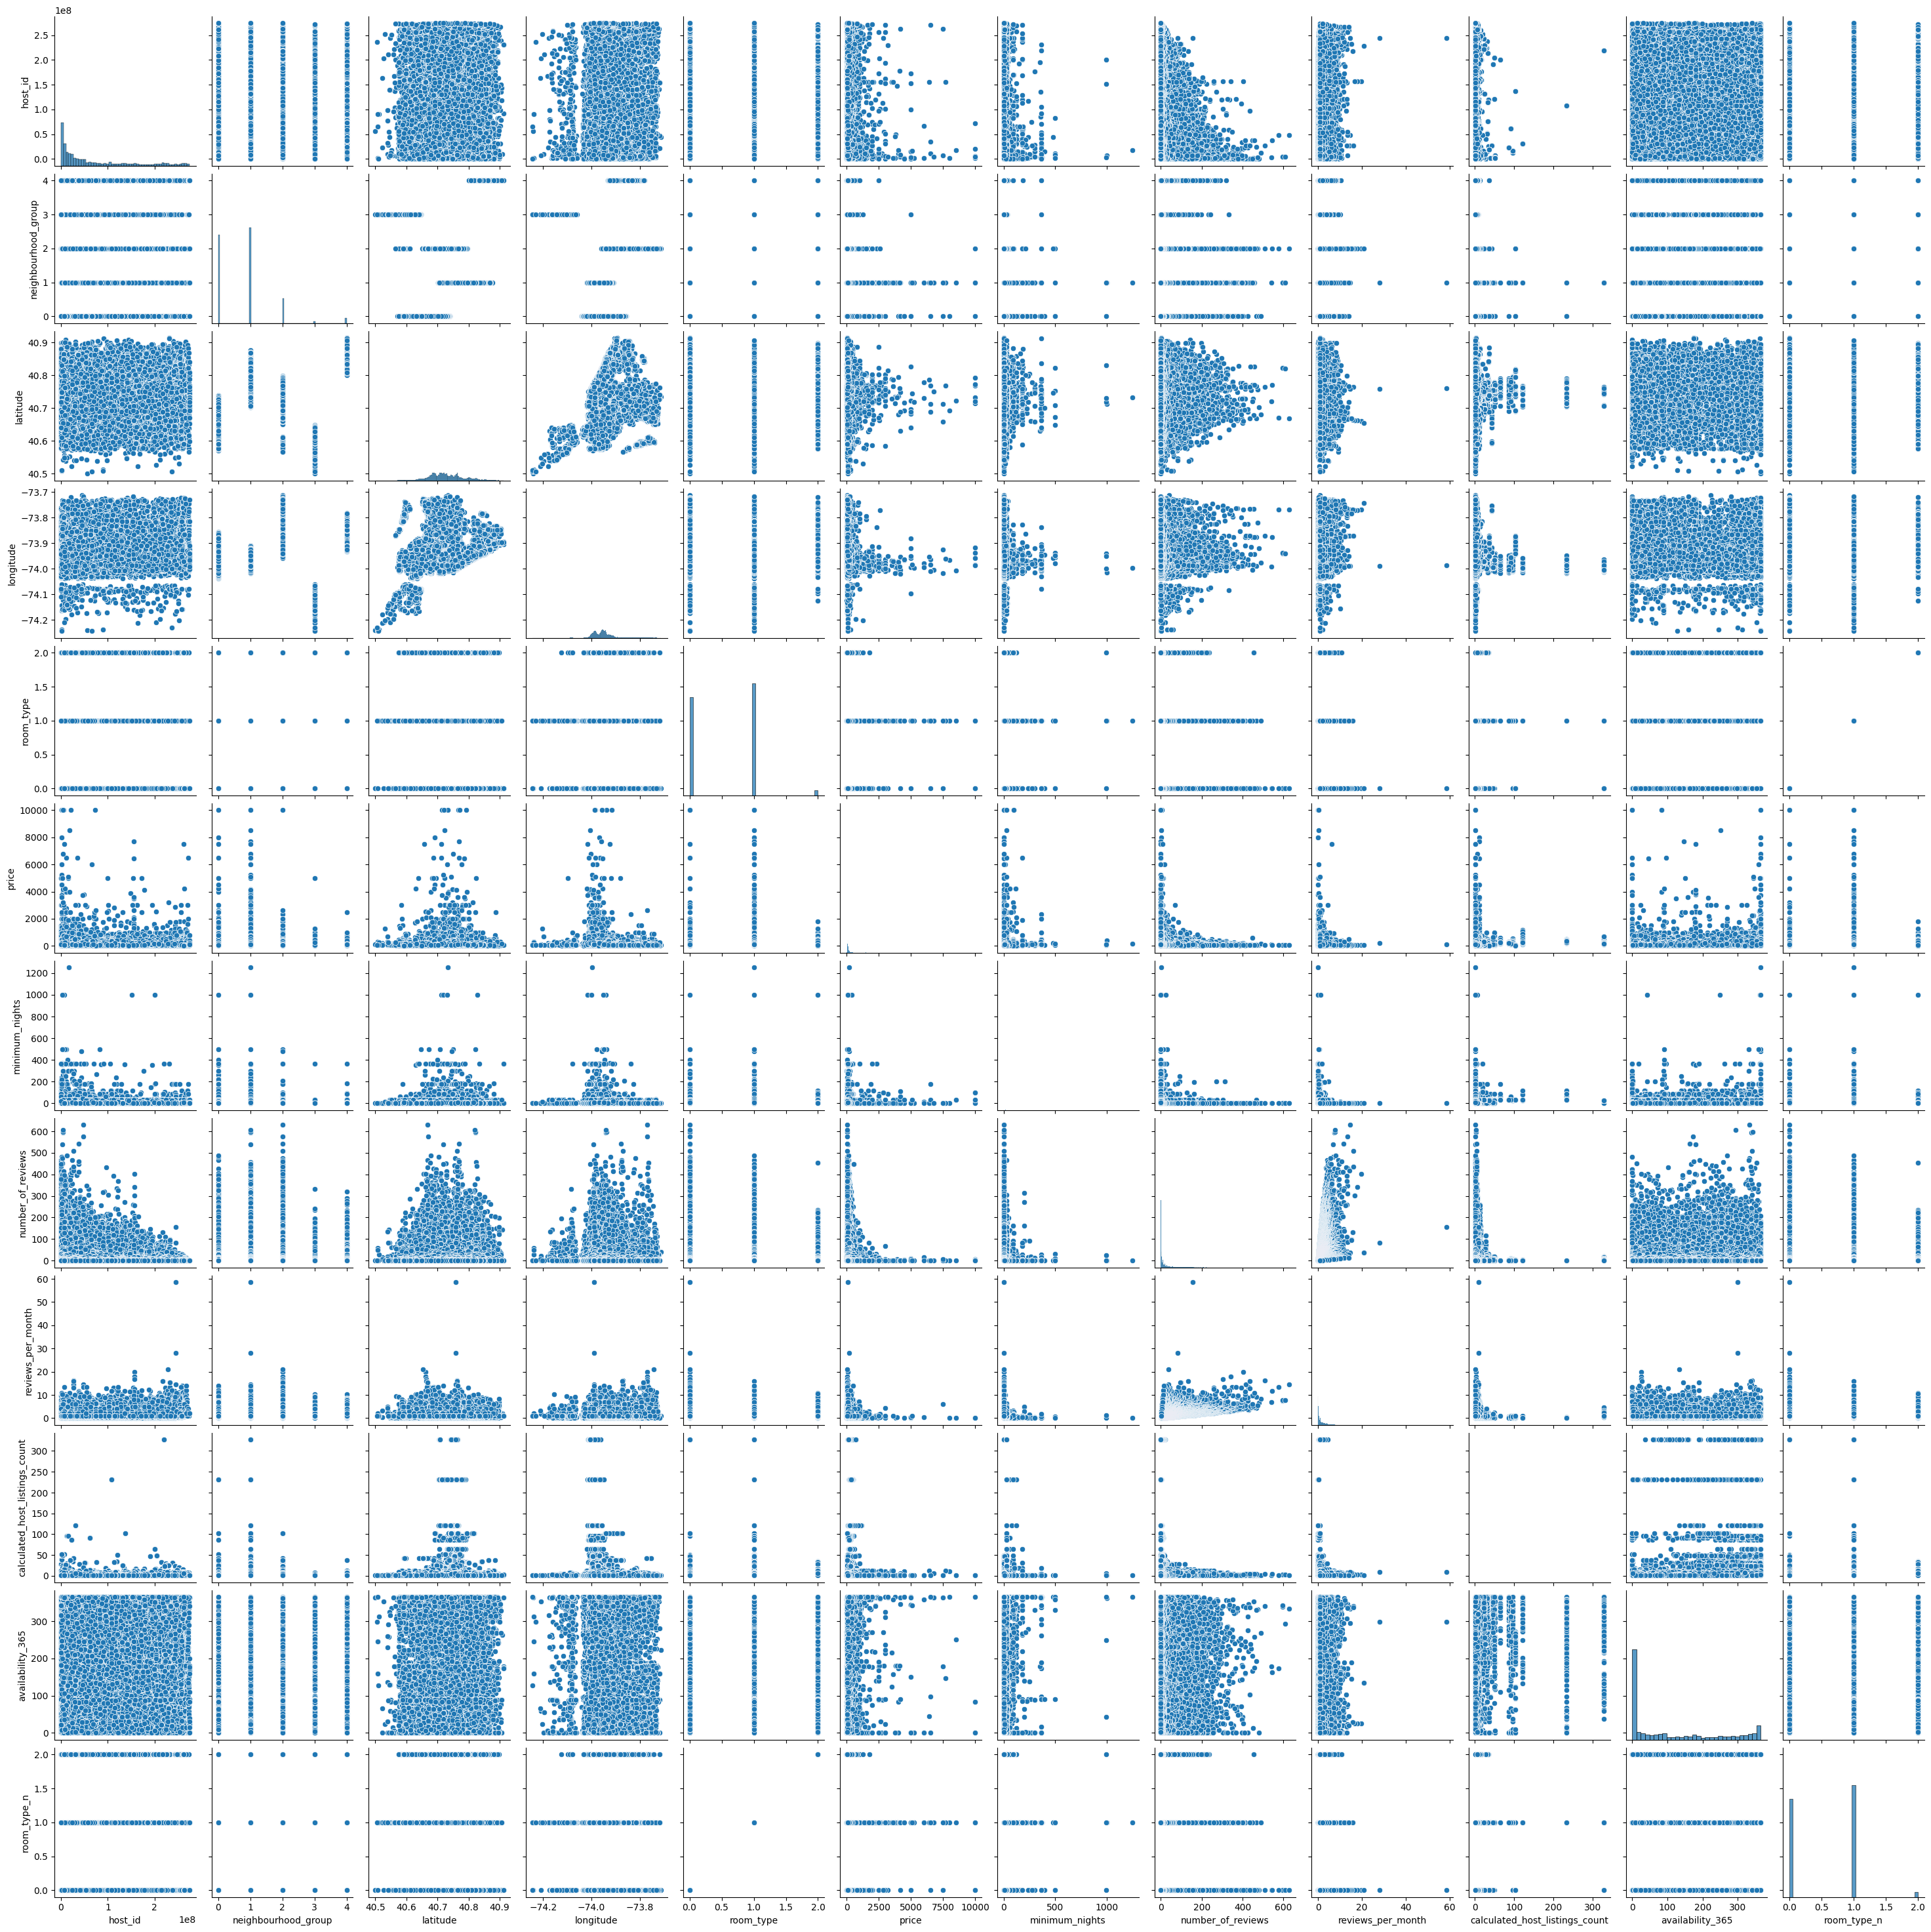

In [228]:
sns.pairplot(data = total_data)

## Paso 5: Análisis de Outliers

In [229]:
total_data.describe()

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_n
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,0.567113
std,7.861097e+07,0.844386,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,0.541249
min,2.438000e+03,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,7.822033e+06,0.000000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,0.000000
50%,3.079382e+07,1.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,1.000000
75%,1.074344e+08,1.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,1.000000
max,2.743213e+08,4.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2.000000


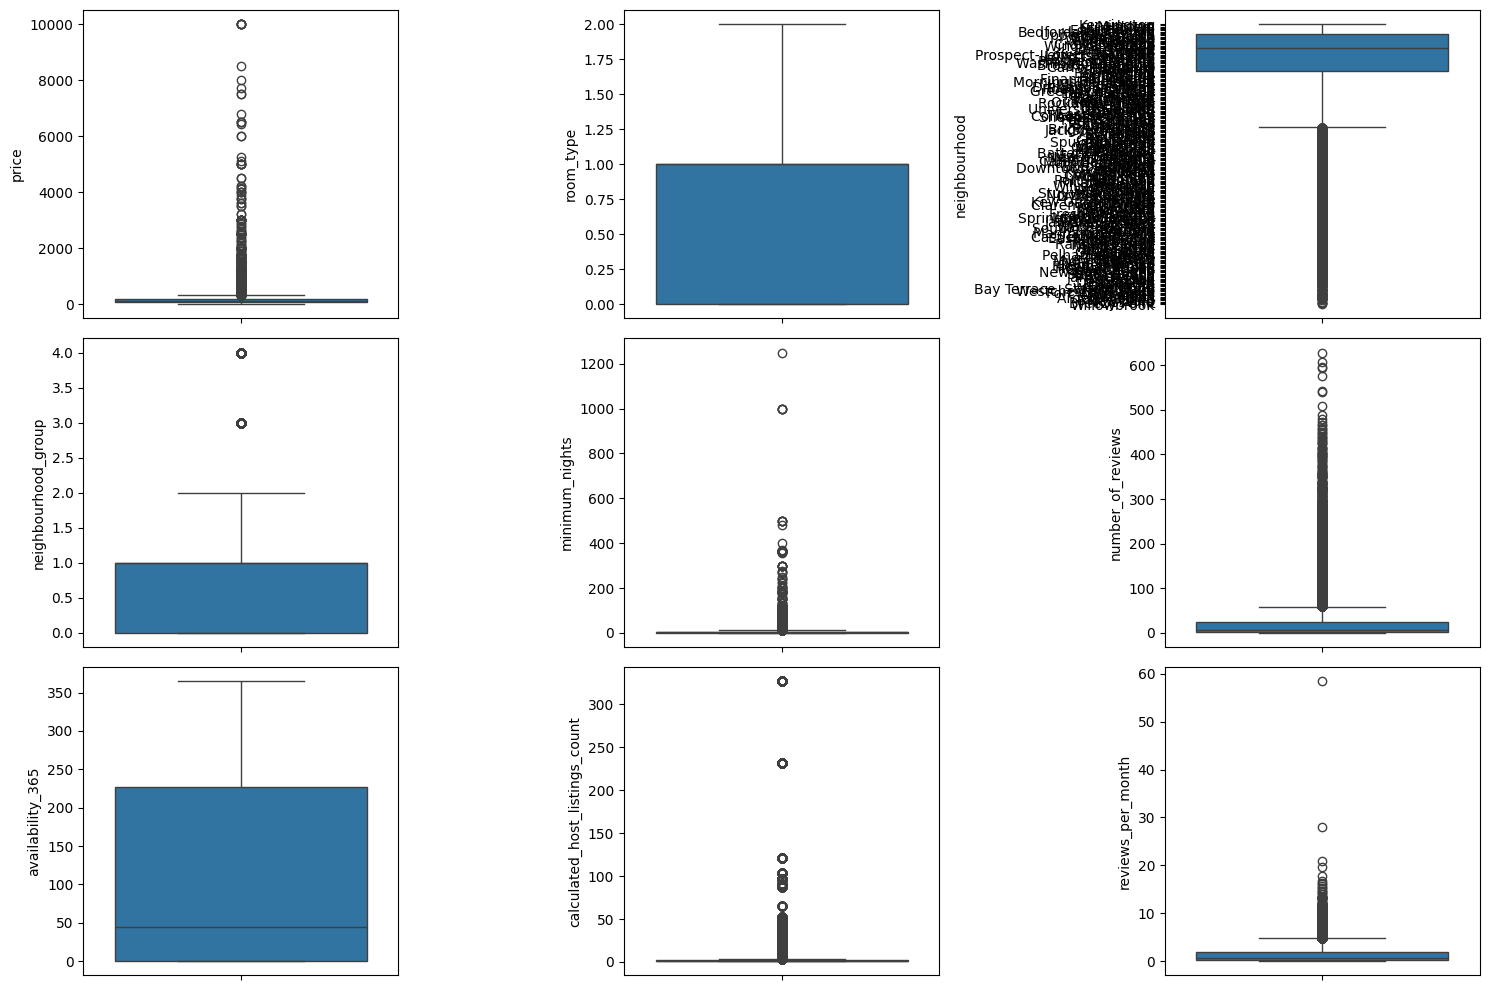

In [230]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "price")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "room_type")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "neighbourhood")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "neighbourhood_group")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "availability_365")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[2, 2], data = total_data, y = "reviews_per_month")

plt.tight_layout()

plt.show()

In [231]:
import json

total_data_con_outliers = total_data.copy()
total_data_sin_outliers = total_data.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "neighbourhood_group"]:
  total_data_sin_outliers, limits_list = replace_outliers_from_column(column, total_data_sin_outliers)
  outliers_dict[column] = limits_list

# with open("outliers_replacement.json", "w") as f:
#   json.dump(outliers_dict, f)
outliers_dict

{'price': [np.float64(-90.0), np.float64(334.0)],
 'minimum_nights': [np.float64(-5.0), np.float64(11.0)],
 'number_of_reviews': [np.float64(-33.5), np.float64(58.5)],
 'reviews_per_month': [np.float64(-2.555), np.float64(4.765000000000001)],
 'calculated_host_listings_count': [np.float64(-0.5), np.float64(3.5)],
 'neighbourhood_group': [np.float64(-1.5), np.float64(2.5)]}

In [232]:
total_data_con_outliers.isnull().sum().sort_values(ascending=False)
total_data_sin_outliers.isnull().sum().sort_values(ascending=False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_category                    0
room_type_n                       0
dtype: int64

## Inferencia de nuevas características

In [233]:
#total_data_con_outliers["FamMembers"] = total_data_con_outliers["SibSp"] + total_data_con_outliers["Parch"]
#total_data_sin_outliers["FamMembers"] = total_data_sin_outliers["SibSp"] + total_data_sin_outliers["Parch"]

#total_data_con_outliers.head()

## Escalado de Valores

In [250]:
from sklearn.model_selection import train_test_split

num_variables = ["minimum_nights", "reviews_per_month", "calculated_host_listings_count", "availability_365"]

# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = total_data_con_outliers.drop("price", axis=1)[num_variables]
X_sin_outliers = total_data_sin_outliers.drop("price", axis=1)[num_variables]
y = total_data_con_outliers["price"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)

import os
save_path = "data/processed/"
os.makedirs(save_path, exist_ok=True)

# Guardar los archivos en la carpeta
X_train_con_outliers.to_excel(f"{save_path}X_train_con_outliers.xlsx", index=False)
X_train_sin_outliers.to_excel(f"{save_path}X_train_sin_outliers.xlsx", index=False)
X_test_con_outliers.to_excel(f"{save_path}X_test_con_outliers.xlsx", index=False)
X_test_sin_outliers.to_excel(f"{save_path}X_test_sin_outliers.xlsx", index=False)
y_train.to_excel(f"{save_path}y_train.xlsx", index=False)
y_test.to_excel(f"{save_path}y_test.xlsx", index=False)

print("Archivos guardados correctamente en 'data/processed/'")

X_train_sin_outliers.head()


Archivos guardados correctamente en 'data/processed/'


,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
32645,3.0,0.870,1.0,1
23615,2.0,0.160,1.0,0
31183,2.0,4.765,2.0,0
29260,3.0,4.765,1.0,267
7275,5.0,0.250,1.0,0


In [241]:
print(total_data_con_outliers.columns)


Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_category',
       'room_type_n'],
      dtype='object')


> NOTA: Sólo se deben escalar las variables predictoras, nunca la objetivo.

A continuación detallaremos cómo podemos aplicar cada una de ellas, pero recordemos que depende mucho del modelo que vayamos a querer entrenar:

##### Normalización

In [252]:
from sklearn.preprocessing import StandardScaler
import os

# Crear el directorio si no existe
save_path = "data/processed/"
os.makedirs(save_path, exist_ok=True)

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = StandardScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index=X_train_con_outliers.index, columns=num_variables)

X_test_con_outliers_norm = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index=X_test_con_outliers.index, columns=num_variables)

# Guardar los datasets normalizados
X_train_con_outliers_norm.to_excel(f"{save_path}X_train_con_outliers_norm.xlsx", index=False)
X_test_con_outliers_norm.to_excel(f"{save_path}X_test_con_outliers_norm.xlsx", index=False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = StandardScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index=X_train_sin_outliers.index, columns=num_variables)

X_test_sin_outliers_norm = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index=X_test_sin_outliers.index, columns=num_variables)

# Guardar los datasets normalizados
X_train_sin_outliers_norm.to_excel(f"{save_path}X_train_sin_outliers_norm.xlsx", index=False)
X_test_sin_outliers_norm.to_excel(f"{save_path}X_test_sin_outliers_norm.xlsx", index=False)

print("Archivos normalizados guardados en 'data/processed/'")

# Mostrar las primeras filas
X_train_con_outliers_norm.head()


Archivos normalizados guardados en 'data/processed/'


,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
32645,-0.193025,-0.302289,-0.186570,-0.852862
23615,-0.239596,-0.722756,-0.186570,-0.860447
31183,-0.239596,NaN,-0.156424,-0.860447
29260,-0.193025,2.090224,-0.186570,1.164663
7275,-0.099884,-0.669457,-0.186570,-0.860447


## Escalado Mínimo-Máximo

In [253]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import os

# Crear el directorio si no existe
save_path = "data/processed/"
os.makedirs(save_path, exist_ok=True)

### ESCALAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index=X_train_con_outliers.index, columns=num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index=X_test_con_outliers.index, columns=num_variables)

# Guardar los datasets escalados
X_train_con_outliers_scal.to_excel(f"{save_path}X_train_con_outliers_scal.xlsx", index=False)
X_test_con_outliers_scal.to_excel(f"{save_path}X_test_con_outliers_scal.xlsx", index=False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()  # O cambiar a StandardScaler si es intencional
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index=X_train_sin_outliers.index, columns=num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index=X_test_sin_outliers.index, columns=num_variables)

# Guardar los datasets escalados
X_train_sin_outliers_scal.to_excel(f"{save_path}X_train_sin_outliers_scal.xlsx", index=False)
X_test_sin_outliers_scal.to_excel(f"{save_path}X_test_sin_outliers_scal.xlsx", index=False)

print("Archivos escalados guardados en 'data/processed/'")

# Mostrar las primeras filas
X_train_con_outliers_scal.head()


Archivos escalados guardados en 'data/processed/'


,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
32645,0.001601,0.014703,0.000000,0.002740
23615,0.000801,0.002565,0.000000,0.000000
31183,0.000801,NaN,0.003067,0.000000
29260,0.001601,0.083775,0.000000,0.731507
7275,0.003203,0.004103,0.000000,0.000000
